# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 6
### Consigna:
1) Implemente las funciones para generar las siguientes ventanas w(k):

Bartlett ó triangular
Hann
Blackman
Flat-top
Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique w(k) y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)| (lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Ω)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

Ω0 será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0 y 
Ω1, aquella frecuencia tal que |W(Ω1)|=2√2∨−3 dB y 
el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)
W2=max{|W(Ω)|},  ∀ Ω≥Ω0


Sugerencia: Normalice Ω0,1 por Δf=fS√N para facilitar la comparación.

Descripción de las ventanas
 
 
Ω0	Ω1	 W2
Rectangular	 	 	 
Bartlett	 	 	 
Hann	 	 	 
Blackman	 	 	 
Flat-top	 	 	 

In [12]:
"""
Created on Wed Oct  6 14:39:14 2021
TS6 V1

@author: Ema
"""

#######################################################################################################################
#%% Configuración y definiciones
#######################################################################################################################
 
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift
import matplotlib.patches as mpatches
from pandas import DataFrame
from IPython.display import HTML

def mi_Bartlett_window( N=2, figura=1 ):
    ##la funcion interta armar un triangulo
    
    muestras=np.arange(0,N,(N-0)/N)
    
    aux=np.copy(muestras)
    aux.fill(0)
    
    for x in range(N):
        if x<=N/2:
            aux[x]= 2*x/N
        else:
           aux[x]=2- 2*x/N 
    
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Bartlett_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi bartlett')
    plt.legend(handles=[notita])
    
    plt.show()

def mi_Hann_window( N=2, figura=1 ):
    ##armo el vector de muestras
    muestras=np.arange(0,N,(N-0)/N)
    #armo un vec aux de igual tamanio
    aux=np.copy(muestras)
    #Lo inicializo
    aux.fill(0)
    for x in range(N):
        #
        aux[x]=0.5*(1-np.cos(2 *np.pi* x/N))
        
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Hann_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi Hann')
    plt.legend(handles=[notita])
    
    plt.show()
    
def mi_Blackman_window( N=2, figura=1 ):
    ##armo el vector de muestras
    muestras=np.arange(0,N,(N-0)/N)
    #armo un vec aux de igual tamanio
    aux=np.copy(muestras)
    #Lo inicializo
    aux.fill(0)
    for x in range(N):
        #
        aux[x]=0.42- 0.5*(np.cos(2 *np.pi* x/N)) + 0.08*(np.cos(4 *np.pi* x/N))
        
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Blackman_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi Blackman')
    plt.legend(handles=[notita])
    
    plt.show()

def mi_Flat_top_window( N=2, figura=1 ):
    ##armo el vector de muestras
    muestras=np.arange(0,N,(N-0)/N)
    #armo un vec aux de igual tamanio
    aux=np.copy(muestras)
    #Lo inicializo
    aux.fill(0)
    for x in range(N):
        #Me robo los coeficientes de matlab no se que usa numpy
        aux[x]=0.21557895- 0.41663158*(np.cos(2 *np.pi* x/N)) + 0.277263158*(np.cos(4 *np.pi* x/N))- 0.083578947*(np.cos(6 *np.pi* x/N))+0.006947368*(np.cos(8 *np.pi* x/N))
        
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Flat_top_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi Flat Top')
    plt.legend(handles=[notita])
    
    plt.show()
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [13]:
#######################################################################################################################
#%% Inicio de la simulación
#######################################################################################################################
plt.close('all')

# Datos generales de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

figura=0
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

f=np.arange(0,fs,fs/N)
muestras=np.arange(0,N,(N-0)/N)

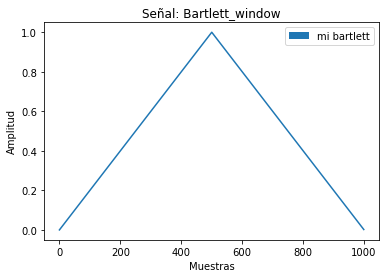

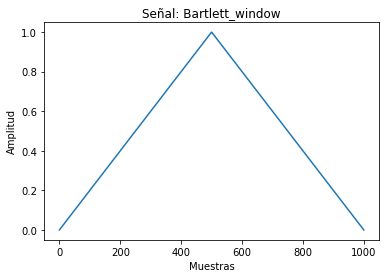

In [14]:
#######################################################################################################################
#%% Barlett
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Bartlett=np.bartlett(N)
##mi bartlett imprime sola
mi_Bartlett_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura=figura+1

plt.plot(muestras,Bartlett)
plt.title('Señal: Bartlett_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


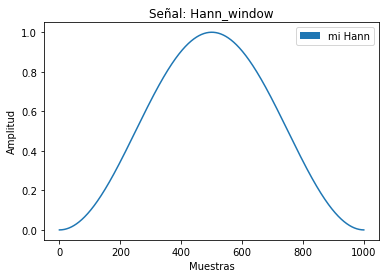

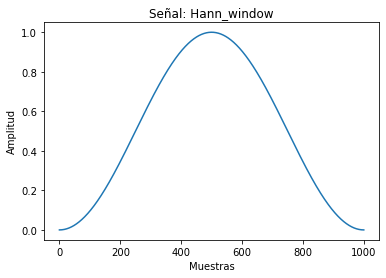

In [15]:
#######################################################################################################################
#%% Hann
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Hann=np.hanning(N)
##mi Hann imprime sola
mi_Hann_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura+=figura

plt.plot(muestras,Hann)
plt.title('Señal: Hann_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


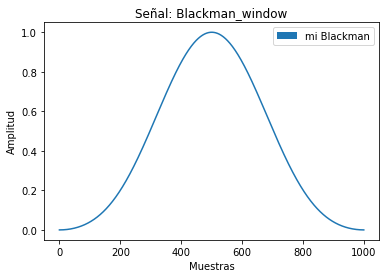

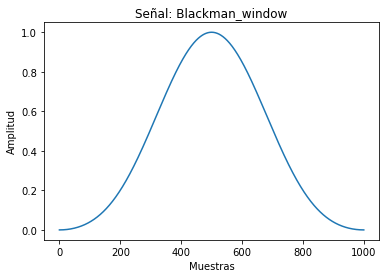

In [16]:
#######################################################################################################################
#%% Blackman
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Blackman=np.blackman(N)
##mi Blackman imprime sola
mi_Blackman_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura+=figura

plt.plot(muestras,Blackman)
plt.title('Señal: Blackman_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


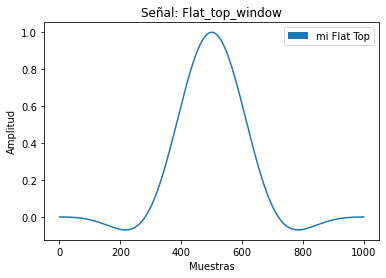

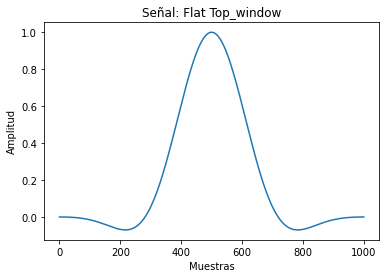

In [17]:
#######################################################################################################################
#%% Flat Top
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Flattop=sig.windows.flattop(N)
##mi Flat top imprime sola
mi_Flat_top_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura+=figura

plt.plot(muestras,Flattop)
plt.title('Señal: Flat Top_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


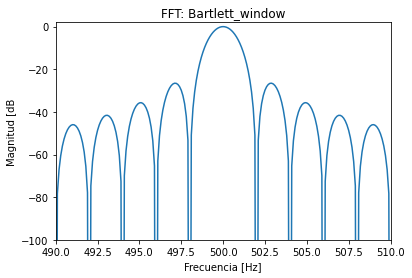

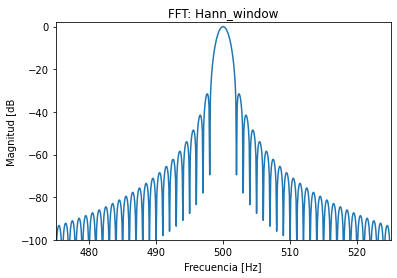

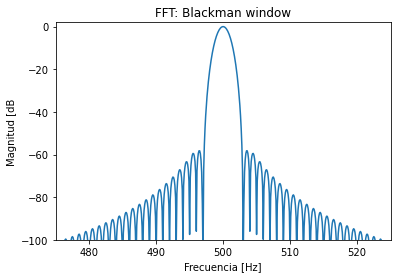

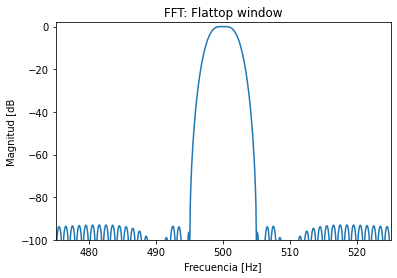

In [18]:
#######################################################################################################################
#%% Hasta aca comprobe que las ventanas son iguales o muy parecidas ahora uso las de scipy y eso
#######################################################################################################################
#Bartlett
NEW_N=10*N
f=np.arange(0,fs,fs/(NEW_N))
Bartlett_fft=fft(Bartlett,NEW_N)
Bartlett_mag=np.abs(fftshift(Bartlett_fft))/np.abs(Bartlett_fft[0])
#print(Bartlett_mag[4500])
##Imprimo las ventanas en omega
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Bartlett_response=20*np.log10(Bartlett_mag)
    
plt.plot(f,Bartlett_response)
plt.title('FFT: Bartlett_window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(490,510)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,2)
plt.show()

#Hann
Hann_fft=fft(Hann,NEW_N)
Hann_mag=np.abs(fftshift(Hann_fft))/np.abs(Hann_fft[0])
#print(Hann_mag[4500])
##Imprimo las ventanas en omega
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Hann_response=20*np.log10(Hann_mag)
    
plt.plot(f,Hann_response)
plt.title('FFT: Hann_window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,2)
plt.show()

#Blackman
Blackman_fft=fft(Blackman,NEW_N)
Blackman_mag=np.abs(fftshift(Blackman_fft))/np.abs(Blackman_fft[0])
#print(Blackman_mag[4500])
##Imprimo las ventanas en omega
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Blackman_response=20*np.log10(Blackman_mag)
    
plt.plot(f,Blackman_response)
plt.title('FFT: Blackman window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,2)
plt.show()

# Flat Top
Flattop_fft=fft(Flattop,NEW_N)
Flattop_mag=np.abs(fftshift(Flattop_fft))/np.abs(Flattop_fft[0])
#print(Flattop_mag[4500])
##Imprimo las ventanas en omega
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Flattop_response=20*np.log10(Flattop_mag)
    
plt.plot(f,Flattop_response)
plt.title('FFT: Flattop window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,2)
plt.show()


In [19]:
#######################################################################################################################
#%% Hallo las frecuencias
#######################################################################################################################
##Como mis respuestas estan centradas en 500 hz
##el primer max y el primer min lo busco pasado la mitad del array
print('Para Bartlett 0 dB indice:',find_nearest(Bartlett_response, 0))
print('Para Bartlett -3 dB indice:',find_nearest(Bartlett_response, -3))
##Como mis respuestas estan centradas en 500 hz
##el primer max y el primer min lo busco pasado la mitad del array
mitad_superior=Bartlett_response[len(Bartlett_response)//2:]
##El primer 0 a ojo vale -300 asique le busco eso todos los demas deberian ser mas profundos
primer_cero=find_nearest(mitad_superior,-300)
print('Para Bartlett -inf dB indice:',primer_cero)
print('Para Bartlett maximo primer lobulo indice:',find_nearest(mitad_superior[primer_cero:], 0),'por encima del primer cero')
print('Osea:',primer_cero+find_nearest(mitad_superior[primer_cero:], 0))

print('Para Hann 0 dB indice:',find_nearest(Hann_response, 0))
print('Para Hann -3 dB indice:',find_nearest(Hann_response, -3))
##Como mis respuestas estan centradas en 500 hz
##el primer max y el primer min lo busco pasado la mitad del array
mitad_superior=Hann_response[len(Hann_response)//2:]
##El primer 0 a ojo vale -69 asique le busco eso todos los demas deberian ser mas profundos
primer_cero=find_nearest(mitad_superior,-69)
print('Para Hann -inf dB indice:',primer_cero)
print('Para Hann maximo primer lobulo indice:',find_nearest(mitad_superior[primer_cero:], 0),'por encima del primer cero')
print('Osea:',primer_cero+find_nearest(mitad_superior[primer_cero:], 0))

print('Para Blackman 0 dB indice:',find_nearest(Blackman_response, 0))
print('Para Blackman -3 dB indice:',find_nearest(Blackman_response, -3))
##Como mis respuestas estan centradas en 500 hz
##el primer max y el primer min lo busco pasado la mitad del array
mitad_superior=Blackman_response[len(Blackman_response)//2:]
##El primer 0 a ojo vale -108 asique le busco eso todos los demas deberian ser mas profundos
primer_cero=find_nearest(mitad_superior,-108)
print('Para Blackman -inf dB indice:',primer_cero)
print('Para Blackman maximo primer lobulo indice:',find_nearest(mitad_superior[primer_cero:], 0),'por encima del primer cero')
print('Osea:',primer_cero+find_nearest(mitad_superior[primer_cero:], 0))

print('Para Flattop 0 dB indice:',find_nearest(Flattop_response, 0))
print('Para Flattop -3 dB indice:',find_nearest(Flattop_response, -3))
##Como mis respuestas estan centradas en 500 hz
##el primer max y el primer min lo busco pasado la mitad del array
mitad_superior=Flattop_response[len(Flattop_response)//2:]
##El primer 0 a ojo vale -108 asique le busco eso todos los demas deberian ser mas profundos
primer_cero=find_nearest(mitad_superior,-108)
print('Para Flattop -inf dB indice:',primer_cero)
print('Para Flattop maximo primer lobulo indice:',find_nearest(mitad_superior[primer_cero:], 0),'por encima del primer cero')
print('Osea:',primer_cero+find_nearest(mitad_superior[primer_cero:], 0))
##El chiste de devolver el indice del vector es que como es igual de largo que el vector frecuencias
##Si reemplazo ese indice en el vector frecuencias obtendria la frecuncia de lo que busco

Para Bartlett 0 dB indice: 5000
Para Bartlett -3 dB indice: 4994
Para Bartlett -inf dB indice: 20
Para Bartlett maximo primer lobulo indice: 9 por encima del primer cero
Osea: 29
Para Hann 0 dB indice: 5000
Para Hann -3 dB indice: 4993
Para Hann -inf dB indice: 96
Para Hann maximo primer lobulo indice: 0 por encima del primer cero
Osea: 96
Para Blackman 0 dB indice: 5000
Para Blackman -3 dB indice: 4992
Para Blackman -inf dB indice: 325
Para Blackman maximo primer lobulo indice: 0 por encima del primer cero
Osea: 325
Para Flattop 0 dB indice: 5000
Para Flattop -3 dB indice: 4981
Para Flattop -inf dB indice: 471
Para Flattop maximo primer lobulo indice: 4 por encima del primer cero
Osea: 475


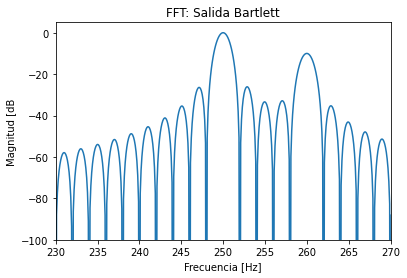

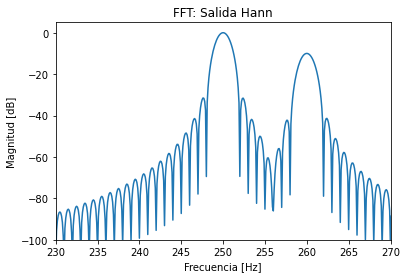

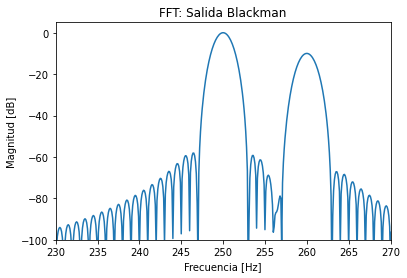

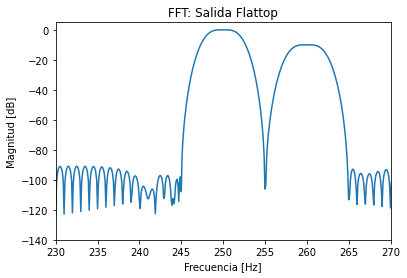

Text(0, 0.5, 'Magnitud [dB]')

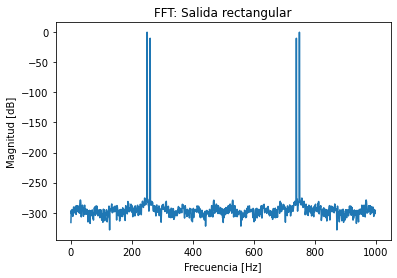

In [20]:
#######################################################################################################################
#%% Armo el filtrado
#######################################################################################################################
f_os=np.arange(0,fs,fs/NEW_N)
f=np.arange(0,fs,fs/N)
t=np.arange(0,1,ts)
f1=(np.pi/2)*1/(2*np.pi)*fs
f2=(13/25*np.pi)*1/(2*np.pi)*fs
mi_senal=np.sin(2*np.pi*f1*t)+10**(-10/20)*np.sin(2*np.pi*(f2)*t)
###Muestro Bartlett
salida=mi_senal*Bartlett
salida_fft=fft(salida,NEW_N)
indice_max=(np.abs(salida_fft)).argmax()
salida_mag=np.abs(salida_fft)/np.abs(salida_fft[indice_max])
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Salida_response=20*np.log10(salida_mag)
    
plt.plot(f_os,Salida_response)
plt.title('FFT: Salida Bartlett')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(230,270)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,5)
plt.show()
#Muestro Hann
salida=mi_senal*Hann
salida_fft=fft(salida,NEW_N)
indice_max=(np.abs(salida_fft)).argmax()
salida_mag=np.abs(salida_fft)/np.abs(salida_fft[indice_max])
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Salida_response=20*np.log10(salida_mag)
    
plt.plot(f_os,Salida_response)
plt.title('FFT: Salida Hann')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(230,270)
plt.ylabel('Magnitud [dB]')
plt.ylim(-100,5)
plt.show()
#Muestro Blackman
salida=mi_senal*Blackman
salida_fft=fft(salida,NEW_N)
indice_max=(np.abs(salida_fft)).argmax()
salida_mag=np.abs(salida_fft)/np.abs(salida_fft[indice_max])
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Salida_response=20*np.log10(salida_mag)
    
plt.plot(f_os,Salida_response)
plt.title('FFT: Salida Blackman')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(230,270)
plt.ylabel('Magnitud [dB]')
plt.ylim(-100,5)
plt.show()
#Muestro Flattop
salida=mi_senal*Flattop
salida_fft=fft(salida,NEW_N)
indice_max=(np.abs(salida_fft)).argmax()
salida_mag=np.abs(salida_fft)/np.abs(salida_fft[indice_max])
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Salida_response=20*np.log10(salida_mag)
    
plt.plot(f_os,Salida_response)
plt.title('FFT: Salida Flattop')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(230,270)
plt.ylabel('Magnitud [dB]')
plt.ylim(-140,5)
plt.show()

#Muestro rectangular
rectangular=sig.windows.boxcar(N)
salida=mi_senal*rectangular
salida_fft=fft(salida)
indice_max=(np.abs(salida_fft)).argmax()
salida_mag=np.abs(salida_fft)/np.abs(salida_fft[indice_max])
plt.figure(figura)
figura=figura+1
with np.errstate(divide='ignore', invalid='ignore'):
    Salida_response=20*np.log10(salida_mag)
    
plt.plot(f,Salida_response)
plt.title('FFT: Salida rectangular')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim(230,270)
plt.ylabel('Magnitud [dB]')
#plt.ylim(-140,5)

In [21]:
print('Por inspeccion visual a las curvas->')
#######################################
# Tu simulación que genere resultados #
#######################################
factor_de_normalizacion=(fs/N)
tus_resultados = [ 
                   [501/factor_de_normalizacion, 500.4/factor_de_normalizacion,-13.3], # <-- acá debería haber numeritos :)
                   [502/factor_de_normalizacion, 500.6/factor_de_normalizacion,-26.5], # <-- acá debería haber numeritos :)
                   [502/factor_de_normalizacion, 500.71/factor_de_normalizacion,-31.5], # <-- acá debería haber numeritos :)
                   [503/factor_de_normalizacion, 500.8/factor_de_normalizacion,-58.25], # <-- acá debería haber numeritos :)
                   [505.025/factor_de_normalizacion, 501.86/factor_de_normalizacion,-94] # <-- acá debería haber numeritos :)
                 ]

tus_resultados=np.abs(np.array(tus_resultados)-500)/10
df = DataFrame(tus_resultados, columns=['$\Omega_0$(cruce por 0)', '$\Omega_1$(-3dB)','$W_2$(max Tranf secun)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())

Por inspeccion visual a las curvas->


,$\Omega_0$(cruce por 0),$\Omega_1$(-3dB),$W_2$(max Tranf secun)
Rectangular,0.1000,0.040,51.330
Bartlett,0.2000,0.060,52.650
Hann,0.2000,0.071,53.150
Blackman,0.3000,0.080,55.825
Flat-top,0.5025,0.186,59.400
